# Step 2: Modeling Using Order Level Classifications

In [1]:
# Imports & Setup:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import PIL
import PIL.Image
from PIL import Image
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

tf.random.set_seed(42)

### Read in Data

In [2]:
# function to load in and process images
def load_image(path):
    images = Image.open(f'./../CUB_200_2011/images/{path}') 
    new_image=images.resize((128,128))
    color_image=new_image.convert("RGB")
    arrays1 = np.asarray(color_image)
    floaters= arrays1.astype('float32')
    floaters2=floaters/255.0
    return floaters2

In [3]:
class_map_dir= pd.read_csv('Tables/class_map_dir_output_new_classes_f.csv')
class_map_dir.head(5)

,F1,Image Id,Image Name,Is Training Image,Class Id,Class Name,Species Gen,Order,Order_Num_Seq,Species,Species_Num_Seq,Family,Family_Num_Seq
0,0,1,001.Black_footed_Albatross/Black_Footed_Albatr...,0,1,001.Black_footed_Albatross,Albatrosses,PROCELLARIIFORMES,11,Albatrosses,1,Diomedeidae,11
1,1,2,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,001.Black_footed_Albatross,Albatrosses,PROCELLARIIFORMES,11,Albatrosses,1,Diomedeidae,11
2,2,3,001.Black_footed_Albatross/Black_Footed_Albatr...,0,1,001.Black_footed_Albatross,Albatrosses,PROCELLARIIFORMES,11,Albatrosses,1,Diomedeidae,11
3,3,4,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,001.Black_footed_Albatross,Albatrosses,PROCELLARIIFORMES,11,Albatrosses,1,Diomedeidae,11
4,4,5,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,001.Black_footed_Albatross,Albatrosses,PROCELLARIIFORMES,11,Albatrosses,1,Diomedeidae,11


In [4]:
# read in class names for order, convert to title text format
class_names=[
"ANSERIFORMES",
"CAPRIMULGIFORMES",
"CHARADRIIFORMES",
"CORACIIFORMES",
"CUCULIFORMES",
"GAVIIFORMES",
"PASSERIFORMES",
"PELECANIFORMES",
"PICIFORMES",
"PODICIPEDIFORMES",
"PROCELLARIIFORMES",
"SULIFORMES"
]

proper_class_names=[i.title() for i in class_names]


## Set up train/test split


In [5]:
class_map_dir_train=class_map_dir.loc[class_map_dir['Is Training Image']==1]
list_of_images_train=[load_image(i) for i in class_map_dir_train['Image Name']]
array_of_img_train=np.asarray(list_of_images_train)
list_of_labels_train=class_map_dir_train['Order_Num_Seq']

In [6]:
class_map_dir_test=class_map_dir.loc[class_map_dir['Is Training Image']==0]
list_of_images_test=[load_image(i) for i in class_map_dir_test['Image Name']]
array_of_img_test=np.asarray(list_of_images_test)
list_of_labels_test=class_map_dir_test['Order_Num_Seq']

In [7]:
# sanity check length of train datasets
print(len(list_of_images_train))
print(len(list_of_labels_train))

# sanity check length of test datasets
print(len(list_of_images_test))
print(len(list_of_labels_test))

5994
5994
5794
5794


In [8]:
X_train_alt=array_of_img_train
y_train_alt=list_of_labels_train

X_test_alt=array_of_img_test
y_test_alt=list_of_labels_test

X_train_alt = X_train_alt.reshape(X_train_alt.shape[0], 128, 128, 3)
X_test_alt = X_test_alt.reshape(X_test_alt.shape[0], 128, 128, 3)
y_train_alt = utils.to_categorical(y_train_alt,13)
y_test_alt = utils.to_categorical(y_test_alt,13)


In [9]:
# work with the saved model 
saved_model_order = tf.keras.models.load_model('saved_models/order_est_v2.h5')

In [17]:
output=saved_model_order.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 random_flip (RandomFlip)    (None, 4, 4, 1280)        0         
                                                                 
 random_rotation (RandomRota  (None, 4, 4, 1280)       0         
 tion)                                                           
                                                                 
 batch_normalization (BatchN  (None, 4, 4, 1280)       5120      
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 20480)             0         
                                                        

In [19]:
im1 = saved_model_order.summary().save("model_summary.jpg")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 random_flip (RandomFlip)    (None, 4, 4, 1280)        0         
                                                                 
 random_rotation (RandomRota  (None, 4, 4, 1280)       0         
 tion)                                                           
                                                                 
 batch_normalization (BatchN  (None, 4, 4, 1280)       5120      
 ormalization)                                                   
                                                                 
 flatten (Flatten)           (None, 20480)             0         
                                                        

AttributeError: 'NoneType' object has no attribute 'save'

## Confusion Matrix

In [11]:
# Prep data for confusion matrix
predictions=saved_model_order.predict(X_test_alt) 
pred_f=np.argmax(predictions,axis=1)
y_test_f=np.argmax(y_test_alt,axis=1)

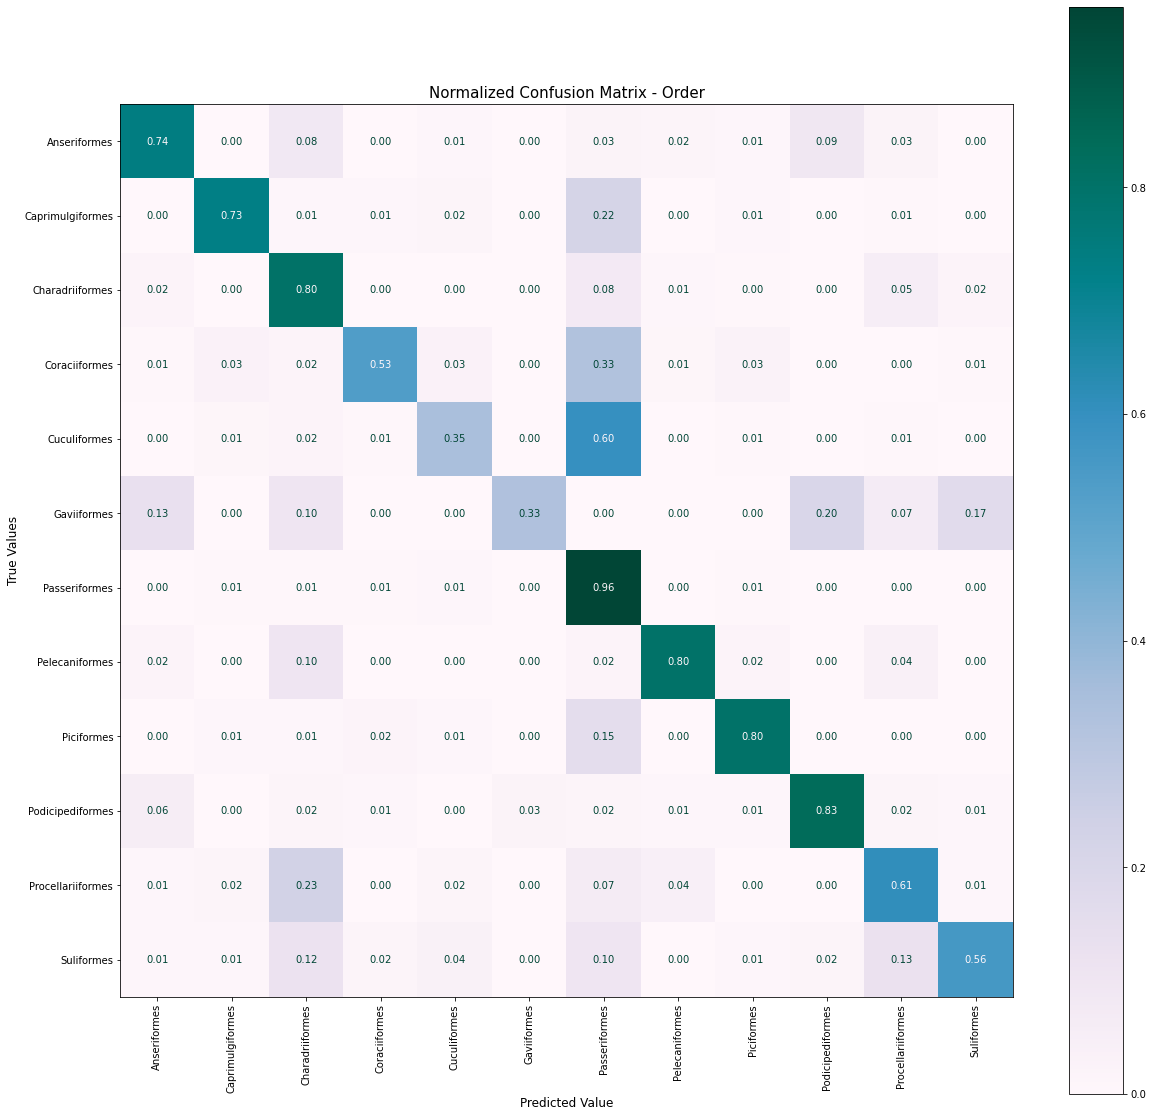

In [15]:
# build normalized confusion matrix display
cm = metrics.confusion_matrix(y_test_f, pred_f, normalize='true') #set normalize = true to see the % distribution by row 
fig, ax = plt.subplots(figsize=(20, 20))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=proper_class_names)
ax.set_title('Normalized Confusion Matrix - Order', fontsize=15)
disp.plot(ax=ax, cmap='PuBuGn',values_format='.2f')
plt.xticks(rotation=90)
plt.xlabel('Predicted Value', fontsize = 12)
plt.ylabel('True Values', fontsize = 12);
plt.savefig('Visualizations/order_confusion_matrix.png');